# 차원 축소
* 너무 많은 특성으로 솔루션 찾기 어려운 차원의 저주 존재
* 고차원을 저차원으로 줄이면 시각화에 유용하고 그래프그리기 좋다.
* mnist의 경우 흰색 배경 부분을 추출해놔도 큰 차이가 없을것.
---
### 차원의 저주
* 차원이 클수록 과대적합의 위험이 커진다.
* 이론적으로 차원의 저주를 해결하는 해결책은 밀도가 충분히 커질때까지 샘플을 키우는 것이나 필요한 샘플은 차원이 커질수록 기하급수적으로 커진다.
---
## 차원 축소를 위한 접근 방법
### 투영
* 일반적으로 특성은 연관되어 있다. 이를 저차원 공간으로 수직 하강 시키듯 투영하는 방법.
* 스위스롤처럼 말려있을 수 있기에 펼쳐진 2D셋을 원한다.
### 매니폴드 학습
* 고차원 공간에서 휘어지거나 뒤틀린 2D모양이다.
* 고차원 데이터셋이 저차원 매니폴드에 가깝게 놓여있다는 매니폴드 가정에 근거하다.
* 차원축소는 훈련 속도는 빨라지지만 항상 더 낫거나,간단한 솔류선이 되는것은 아니다.
---
### PCA
* 가장 인기있는 차원 축소 알고리즘.
* 가장 가까운 초평면을 정의하고 데이터를 투영시킨다.
##### 분산 보존
* 올바른 초평면을 선택해야한다.
* 분산이 최대로 보존되는 축이 정보가 가장 적게 손실되므로 합리적이다.
##### 주성분
* PCA는 훈련세트에서 분산이 최대인 축을 찾는다. 또한, 첫번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다.
* 이전 축에 직교하는 N번째 축을 찾고 n번째 축을 n번째 주성분(PC)이라고 한다.
* 특잇값 분해(SVD)를 통해 3개의 행렬곱셉인 UEV로 분해하고 V에 벡터로 주성분이 담겨있다.


In [2]:
import numpy as np
np.random.seed(42)
m=60
w1,w2=0.1,0.3
noise=0.1

angles=np.random.rand(m)*3*np.pi/2-0.5
x=np.empty((m,3))
x[:,0]=np.cos(angles)+np.sin(angles)/2+noise*np.random.randn(m)/2
x[:,1]=np.sin(angles)*0.7+noise*np.random.randn(m)/2
x[:,2]=x[:,0]*w1+x[:,1]*w2+noise*np.random.randn(m)

In [12]:
x_centered=x-x.mean(axis=0)
u,s,vt=np.linalg.svd(x_centered)
c1=vt.T[:,0]
c2=vt.T[:,1]

### d차원으로 투영하기
* d개의 주성분으로 초평면에 투영하여 데이터의 차원을 d차원으로 축소시킬 수 있다.
* 축소를 위해서는 행렬 X와 V의 첫 d열로 구성된 Wd를 곱하면 된다.

In [14]:
W2=vt.T[:,:2]
x2d=x_centered.dot(W2)
# 첫 두개의 주성분으로 정의된 평면에 훈련 세트를 투영한다.

### 사이킷런 이용하기
*PCA분석 해버리기

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2d2=pca.fit_transform(x)

### 설명된 분산의 비율
* 분산 비율도 유용한 정보중 하나이다.

In [18]:
pca.explained_variance_ratio_
# 분산의 84.2%가 첫번째 pc를 따라 놓이고, 14.6%가 두번째, 세번째는 1.2%이하로 아주 적은 정보가있다.

array([0.85406025, 0.13622918])

### 적절한 차원 수 선택하기
* 임의로 축소 차원 수를 정하기 보다는 충분한 분산이 될때까지 더해야 할 차원수를 선택하는 것이 간단하다.
* 시각화를 위해서는 2개나 3개로 줄이는 것이 일반적.

In [20]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
mnist.target=mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split
x=mnist["data"][:10000]
y=mnist["target"][:10000]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
pca=PCA()
pca.fit(x)
cumsum=np.cumsum(pca.explained_variance_ratio_)# cumsum 누적합
d=np.argmax(cumsum>=0.95)+1# 95이상의 분산까지의 차원.

In [38]:
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(x_train)

### 압축을 위한 PCA
* 데이터의 분산은 유지하고 크기는 많이 줄인다.
*PCA 투영을 반대로 적용해서 되돌릴 수도있다. 원본 데이터 셋을 얻을 수는 없다만 비슷하다.
* 원본 데이터 사이의 평균 제곱 거리를 재구성 오차 라고 한다.

In [40]:
pca=PCA(n_components=154)
x_reduced=pca.fit_transform(x_train)
x_recovered=pca.inverse_transform(x_reduced)

In [43]:
pca.n_components

154

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
im1=x_train[0].reshape(28,28)
im2=x_recovered[0].reshape(28,28)

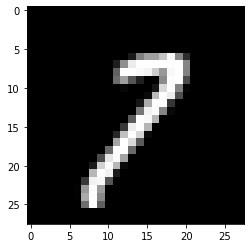

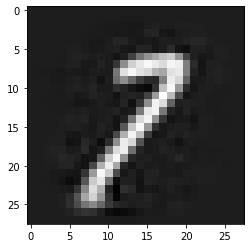

In [47]:
plt.imshow(im1,cmap="gray")
plt.show()
plt.imshow(im2,cmap="gray") # 복원된 이미지

### 랜덤 PCA
* 랜덤 PCA를 이용하면 d가 n보다 작으면 SVD보다 훨 빠르다!
* svd_solver의 기본값은 "auto"이다. m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 pca알고리즘 사용

In [48]:
rnd_pca=PCA(n_components=154,svd_solver="randomized")
x_reduced=rnd_pca.fit_transform(x_train)


### 점진적 PCA
* 훔련세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다.
* 훈련 세트가 클 때 유용하고 온라인(실시간으로)으로 PCA를 적용한다.
* 100개의 미니배치로 나누고 파이썬 클래스에 주입하여 MNIST데이터셋의 차원을 154개로 줄인다.
* fit 메서드가 아닌 partial_fit 메서드를 미니배치마다 호출해야 합니다.

In [69]:
from sklearn.decomposition import IncrementalPCA
n_batches=10
inc_pca=IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train,n_batches):
  inc_pca.partial_fit(x_batch)

x_reduced=inc_pca.transform(x_train)

### 커널 PCA
* 샘플을 고차원 공간으로 매핑하여 SVM을 하는 것을 PCA에 적용해서 복잡한 비선형 투형을 수행할 수 있다. 이를 커널 PCA라고 한다.
*투영된 후 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을  펼칠 때도 유용하다.
* RBF커널로 KPCA를 적용한다.

In [75]:
from sklearn.datasets import make_swiss_roll
x,t=make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
#스위스롤

In [76]:
from sklearn.decomposition import KernelPCA

rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
x_reduced=rbf_pca.fit_transform(x)

### 커널 선택과 하이퍼파라미터 튜닝
* kPCA는 비지도학습이기에 좋은 커널과 하이퍼 파라미터를 위한 명확한 성능 측정 기준이 없다.
* 차원축소는 종종 지도학습의 전처리단계로 활용하므로 그리드 탐색을 이용해서 문제에서 성능이 가장 좋은 커널과 하이퍼 파라미터를 선택할 수 있다.
* 파이프라인의 마지막 단계에서 가장 높은 정확도를 위해 그리드서치를 사용한다!


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
y=t>6.9
clf=Pipeline([
              ("kpca",KernelPCA(n_components=2)),
              ("log_reg",LogisticRegression())
])
param_grid=[{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":["rbf","sigmoid"]
}]
grid_search=GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [80]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

* 완전한 비지도 학습 방법으로 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있지만 재구성은 선형 PCA만큼 쉽지가 않다.
* 재구성에 가깝게 매핑된 원봉공간의 포인트를 찾을 수 있고 이것을 재구성 원상이라고 부른다.
* 샘플과의 제곱거리를 측정함으로 오차 최소화하는 커널과 하이퍼 파라미터 선택 가능.
* 재구성하는 하나의 방법은 투영샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도학습 회귀 모델을 훈련시키는 것.

In [81]:
rbf_pca=KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,fit_inverse_transform=True)
x_reduced=rbf_pca.fit_transform(x)
x_preimage=rbf_pca.inverse_transform(x_reduced)

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,x_preimage)

32.786308795766125

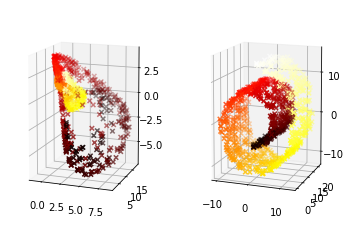

In [91]:
ax=plt.subplot(121,projection='3d')
ax.view_init(10,-70)
ax.scatter(x_preimage[:,0],x_preimage[:,1],x_preimage[:,2],c=t,cmap=plt.cm.hot,marker="x")
ax=plt.subplot(122,projection='3d')
ax.view_init(10,-70)
ax.scatter(x[:,0],x[:,1],x[:,2],c=t,cmap=plt.cm.hot,marker="x")

### LLE
* 지역임베딩(LLE)sms 또다른 강력한 비선형 차원 축소 기술이다.
* 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정. 그 후에 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다. 잡음이 적은경우 꼬인 매니폴드를 펼치는데 좋다.

In [92]:
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
x_reduced=lle.fit_transform(x)